## Multi-task Cascaded Convolutional Networks (MTCNN)

In this tutorial we are using [MTCNN Face Detection Package](https://github.com/ipazc/mtcnn) to detect human faces in the pictures. It is using tensorflow in this backend, so make sure you have installed ```Tensorflow>=1.4.0``` and ```OpenCV>=3.2``` 

#### 1. Import required packages

In [2]:
%matplotlib inline

import cv2 as cv
import matplotlib.pyplot as plt

from IPython.display import Image

from mtcnn.mtcnn import MTCNN

import os
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

#### 2. Read an image

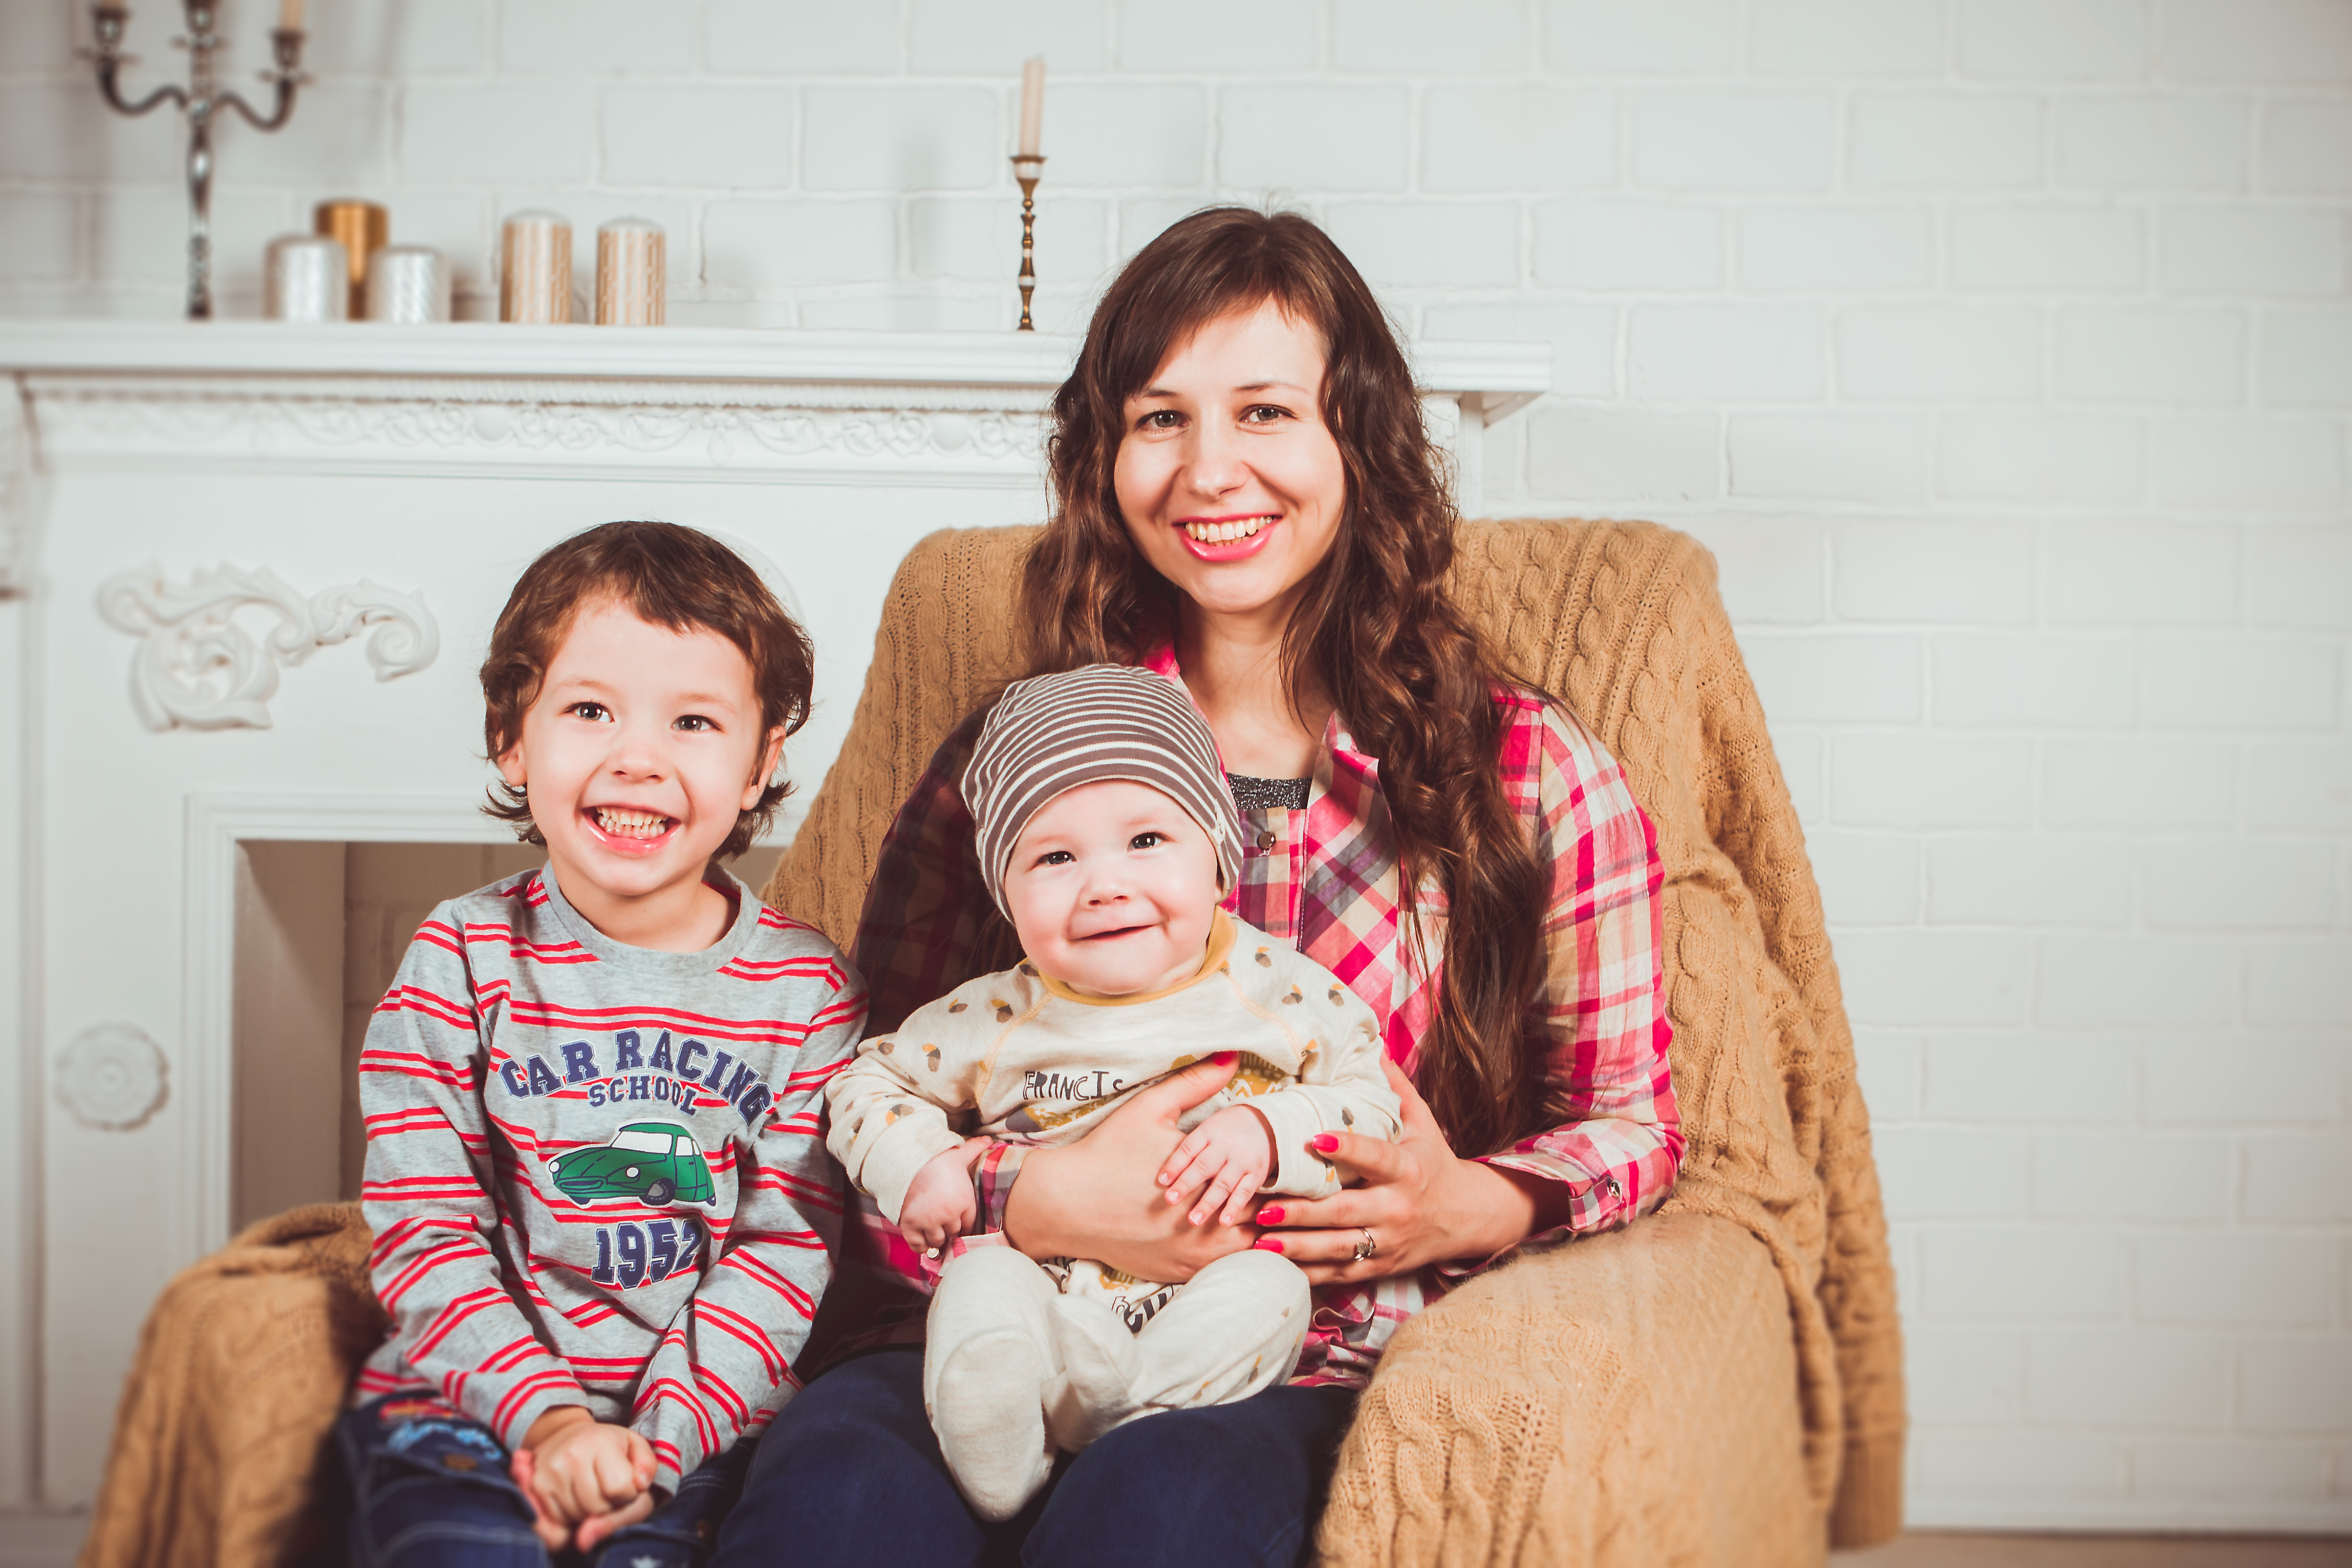

In [3]:
# display the image
IMGDIR = './images'
img_2_path = os.path.join(IMGDIR, 'img_2.jpg')
Image(img_2_path)

In [4]:
# read an image
original_img = cv.imread(img_2_path)
original_img.shape

(3209, 4813, 3)

#### 3. Apply Classifier

In [6]:
# create an instance of the classifier
detector = MTCNN()

In [7]:
# use detect_faces method to detect human faces in an image
result = detector.detect_faces(original_img)

In [8]:
result

[{'box': [2066, 1582, 396, 452],
  'confidence': 0.9979180693626404,
  'keypoints': {'left_eye': (2163, 1761),
   'mouth_left': (2205, 1921),
   'mouth_right': (2365, 1898),
   'nose': (2265, 1814),
   'right_eye': (2340, 1726)}},
 {'box': [2266, 620, 469, 615],
  'confidence': 0.997577965259552,
  'keypoints': {'left_eye': (2377, 862),
   'mouth_left': (2387, 1073),
   'mouth_right': (2617, 1059),
   'nose': (2470, 993),
   'right_eye': (2589, 845)}},
 {'box': [1080, 1252, 443, 587],
  'confidence': 0.996587872505188,
  'keypoints': {'left_eye': (1212, 1456),
   'mouth_left': (1188, 1655),
   'mouth_right': (1397, 1687),
   'nose': (1309, 1572),
   'right_eye': (1419, 1484)}},
 {'box': [966, 2943, 52, 66],
  'confidence': 0.8939292430877686,
  'keypoints': {'left_eye': (988, 2969),
   'mouth_left': (993, 2996),
   'mouth_right': (1012, 2995),
   'nose': (1003, 2985),
   'right_eye': (1011, 2966)}}]

The <b>result</b> variable returns a list of JSON object contains three main keys -
- <b>Box: </b>The bounding box is formatted as [x, y, width, height] under the key ```'box'```
- <b>Confidence: </b>The confidence is the probability for a bounding box to be matching face.
- <b>Keypoints: </b>The keypoints are formatted into a JSON object with the keys ```'left_eye', 'right_eye', 'nose', 'mouth_left', and 'mouth_right'```. Each keypoint is identified by a pixel position (x, y). 

In [9]:
# print out the total number of faces detected
print("{} human faces detected in an image.".format(len(result)))

4 human faces detected in an image.


The result says four human faces are detected, but we can see that the last detection is having very less confidence interval. So we can simply elimenate the last one.

#### 4. Draw Boundary Boxes and Circles

Now, after receiving the pixel values in the ```JSON format``` we can simply draw it on the original image.

In [10]:
# choose a threshold confidence value
threshold_confidence = 0.99

# set other commonly used parameters
COLOR = (0, 255, 0) # color of boundary boxes and circles
THICKNESS = 10 # thickness of boundary line
RADIUS = 2 # radius of the circle drawn

In [11]:
for img in result:
    bounding_box = img['box']
    keypoints = img['keypoints']
    confidence = img['confidence']
    if confidence > threshold_confidence:
        # plot boundary for detected human face
        cv.rectangle(img = original_img,
                     pt1 = (bounding_box[0], bounding_box[1]),
                     pt2 = (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                     color = COLOR,
                     thickness = THICKNESS
                    )
        # plot point for left-eye
        cv.circle(img = original_img, 
                  center = (keypoints['left_eye']), # center of the circle
                  radius = RADIUS,
                  color = COLOR,
                  thickness = THICKNESS
                 )
        # plot the right-eye
        cv.circle(img = original_img, 
                  center = (keypoints['right_eye']), # center of the circle
                  radius = RADIUS,
                  color = COLOR,
                  thickness = THICKNESS
                 )
        # plot the nose
        cv.circle(img = original_img, 
                  center = (keypoints['nose']), # center of the circle
                  radius = RADIUS,
                  color = COLOR,
                  thickness = THICKNESS
                 )
        # plot the mouth-left
        cv.circle(img = original_img, 
                  center = (keypoints['mouth_left']), # center of the circle
                  radius = RADIUS,
                  color = COLOR,
                  thickness = THICKNESS
                 )
        # plot the mouth-right
        cv.circle(img = original_img, 
                  center = (keypoints['mouth_right']), # center of the circle
                  radius = RADIUS,
                  color = COLOR,
                  thickness = THICKNESS
                 )

#### 5. Save the classified image

In [12]:
# function to save file
def save_file(file_path, img):
    cv.imwrite(file_path, img)

In [13]:
# save file
save_file(file_path = './classified_images/classified_img_2.jpg', img = original_img)